In [2]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz 
!tar xvzf ta-lib-0.4.0-src.tar.gz
import os
os.chdir('ta-lib') 
!./configure --prefix=/usr
!make
!make install

os.chdir('../')
!pip install TA-Lib

--2021-12-03 09:03:03--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-12-03 09:03:03--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2021-12-03 09:03:03--  http://phoenixnap.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving phoenixna

In [3]:
import os
import numpy as np
import csv
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import math

   
import os
import pandas as pd
import numpy as np
import pandas as pd
import statsmodels.api as sm
from numpy import *
from math import sqrt
from pandas import *
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pickle import dump


import time
import os
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from pickle import load
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras.layers import GRU, Dense, Flatten, Conv1D, BatchNormalization, LeakyReLU, ELU, ReLU
from tensorflow.keras import Sequential, regularizers
from tensorflow.python.client import device_lib

### Importing all the required library ###
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import math
import h5py
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from numpy import array
from tensorflow.keras.models import Sequential,save_model,load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras import backend
from tensorflow.keras.layers import Dense ,LeakyReLU
from tensorflow.keras.layers import Flatten, Dropout, BatchNormalization, Reshape
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Conv1D, Conv2D ,Conv3D ,Conv2DTranspose,Conv1DTranspose
from tensorflow.keras.layers import MaxPooling1D, MaxPooling2D
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot

# import talib as ta
import csv
from tensorflow.keras import regularizers
from sklearn.metrics import mean_squared_error 


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
# Code to download file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)


id = '1vhAqz8lvWfxH0dcy5QTpKm5qawb6SW5K'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AUD_USD_M30.csv') 
 
id = '13_lAB-ioAmtmWabgm5hHBXYY5ssw2QKs'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AUD_USD_M15.csv')
 
id = '1TPA4Mtbjws9yTJdpV1kK5fDA0Vxk_2eo'
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('AUD_USD_H1.csv')



# Dataset fill

## 15M

In [4]:
dataset_M15 = pd.read_csv('AUD_USD_M15.csv', parse_dates=[0], index_col=0)
dataset_M15.index

DatetimeIndex(['2005-01-02 18:45:00+00:00', '2005-01-02 19:15:00+00:00',
               '2005-01-02 19:45:00+00:00', '2005-01-02 20:00:00+00:00',
               '2005-01-02 20:15:00+00:00', '2005-01-02 20:30:00+00:00',
               '2005-01-02 20:45:00+00:00', '2005-01-02 21:00:00+00:00',
               '2005-01-02 21:15:00+00:00', '2005-01-02 21:30:00+00:00',
               ...
               '2021-07-30 18:30:00+00:00', '2021-07-30 18:45:00+00:00',
               '2021-07-30 19:00:00+00:00', '2021-07-30 19:15:00+00:00',
               '2021-07-30 19:30:00+00:00', '2021-07-30 19:45:00+00:00',
               '2021-07-30 20:00:00+00:00', '2021-07-30 20:15:00+00:00',
               '2021-07-30 20:30:00+00:00', '2021-07-30 20:45:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=417944, freq=None)

In [5]:
t_index_M15 = pd.date_range('2005-01-02 18:45:00+00:00',  '2021-07-30 20:45:00+00:00', freq='15T')  
dataset_M15 = dataset_M15.reindex(t_index_M15)

In [6]:
dataset_M15 = dataset_M15.reset_index(level=0)
dataset_M15 = dataset_M15.rename(columns={'index':'datetime'})

In [7]:
ful_data0_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 0]  
ful_data1_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 1]
ful_data2_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 2]
ful_data3_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 3]
ful_data4_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 4]
ful_data4_M15 = ful_data4_M15[ful_data4_M15['datetime'].dt.hour.isin(np.arange(0, 22))]
ful_data6_M15 = dataset_M15[dataset_M15['datetime'].dt.dayofweek == 6]
ful_data6_M15 = ful_data6_M15[ful_data6_M15['datetime'].dt.hour.isin(np.arange(21, 24))]

In [8]:
ful_data_M15 = pd.concat([ful_data0_M15, ful_data1_M15, ful_data2_M15, ful_data3_M15, ful_data4_M15, ful_data6_M15])
ful_data_M15 = ful_data_M15.sort_values(by = 'datetime')

In [9]:
ful_data_M15 = ful_data_M15.reset_index()
ful_data_M15 = ful_data_M15.drop(labels='index',axis=1)

In [10]:
ful_data_M15 = ful_data_M15.pad()  
ful_data_M15

,datetime,open,high,low,close
0,2005-01-02 21:00:00+00:00,0.78110,0.78150,0.78110,0.78140
1,2005-01-02 21:15:00+00:00,0.78110,0.78110,0.78070,0.78090
2,2005-01-02 21:30:00+00:00,0.78080,0.78100,0.78070,0.78100
3,2005-01-02 21:45:00+00:00,0.78090,0.78090,0.78060,0.78060
4,2005-01-02 22:00:00+00:00,0.78070,0.78100,0.78070,0.78090
...,...,...,...,...,...
418651,2021-07-30 19:45:00+00:00,0.73381,0.73402,0.73331,0.73378
418652,2021-07-30 20:00:00+00:00,0.73375,0.73426,0.73365,0.73402
418653,2021-07-30 20:15:00+00:00,0.73398,0.73404,0.73384,0.73398
418654,2021-07-30 20:30:00+00:00,0.73394,0.73462,0.73387,0.73462


In [11]:
np.any(ful_data_M15.isnull())

False

## 30M

In [12]:
dataset_M30 = pd.read_csv('AUD_USD_M30.csv', parse_dates=[0], index_col=0)
dataset_M30.index

DatetimeIndex(['2005-01-02 18:30:00+00:00', '2005-01-02 19:00:00+00:00',
               '2005-01-02 19:30:00+00:00', '2005-01-02 20:00:00+00:00',
               '2005-01-02 20:30:00+00:00', '2005-01-02 21:00:00+00:00',
               '2005-01-02 21:30:00+00:00', '2005-01-02 22:00:00+00:00',
               '2005-01-02 22:30:00+00:00', '2005-01-02 23:00:00+00:00',
               ...
               '2021-07-30 16:00:00+00:00', '2021-07-30 16:30:00+00:00',
               '2021-07-30 17:00:00+00:00', '2021-07-30 17:30:00+00:00',
               '2021-07-30 18:00:00+00:00', '2021-07-30 18:30:00+00:00',
               '2021-07-30 19:00:00+00:00', '2021-07-30 19:30:00+00:00',
               '2021-07-30 20:00:00+00:00', '2021-07-30 20:30:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=209850, freq=None)

In [13]:
t_index_M30 = pd.date_range('2005-01-02 18:30:00+00:00',  '2021-07-30 20:30:00+00:00', freq='30T')
dataset_M30 = dataset_M30.reindex(t_index_M30)

In [14]:
dataset_M30 = dataset_M30.reset_index(level=0)
dataset_M30 = dataset_M30.rename(columns={'index':'datetime'})

In [15]:
ful_data0_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 0]  
ful_data1_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 1]
ful_data2_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 2]
ful_data3_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 3]
ful_data4_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 4]
ful_data4_M30 = ful_data4_M30[ful_data4_M30['datetime'].dt.hour.isin(np.arange(0, 22))]
ful_data6_M30 = dataset_M30[dataset_M30['datetime'].dt.dayofweek == 6]
ful_data6_M30 = ful_data6_M30[ful_data6_M30['datetime'].dt.hour.isin(np.arange(21, 24))]

In [16]:
ful_data_M30 = pd.concat([ful_data0_M30, ful_data1_M30, ful_data2_M30, ful_data3_M30, ful_data4_M30, ful_data6_M30])
ful_data_M30 = ful_data_M30.sort_values(by = 'datetime')

In [17]:
ful_data_M30 = ful_data_M30.reset_index()
ful_data_M30 = ful_data_M30.drop(labels='index',axis=1)

In [18]:
ful_data_M30 = ful_data_M30.pad()
ful_data_M30

,datetime,open,high,low,close
0,2005-01-02 21:00:00+00:00,0.78110,0.78150,0.78070,0.78090
1,2005-01-02 21:30:00+00:00,0.78080,0.78100,0.78060,0.78060
2,2005-01-02 22:00:00+00:00,0.78070,0.78130,0.78070,0.78130
3,2005-01-02 22:30:00+00:00,0.78160,0.78240,0.78140,0.78240
4,2005-01-02 23:00:00+00:00,0.78250,0.78390,0.78220,0.78370
...,...,...,...,...,...
209323,2021-07-30 18:30:00+00:00,0.73328,0.73363,0.73310,0.73348
209324,2021-07-30 19:00:00+00:00,0.73352,0.73390,0.73352,0.73386
209325,2021-07-30 19:30:00+00:00,0.73383,0.73402,0.73331,0.73378
209326,2021-07-30 20:00:00+00:00,0.73375,0.73426,0.73365,0.73398


## 1H

In [19]:
dataset_H1 = pd.read_csv('AUD_USD_H1.csv', parse_dates=[0], index_col=0)
dataset_H1.index

DatetimeIndex(['2005-01-02 18:00:00+00:00', '2005-01-02 19:00:00+00:00',
               '2005-01-02 20:00:00+00:00', '2005-01-02 21:00:00+00:00',
               '2005-01-02 22:00:00+00:00', '2005-01-02 23:00:00+00:00',
               '2005-01-03 00:00:00+00:00', '2005-01-03 01:00:00+00:00',
               '2005-01-03 02:00:00+00:00', '2005-01-03 03:00:00+00:00',
               ...
               '2021-07-30 11:00:00+00:00', '2021-07-30 12:00:00+00:00',
               '2021-07-30 13:00:00+00:00', '2021-07-30 14:00:00+00:00',
               '2021-07-30 15:00:00+00:00', '2021-07-30 16:00:00+00:00',
               '2021-07-30 17:00:00+00:00', '2021-07-30 18:00:00+00:00',
               '2021-07-30 19:00:00+00:00', '2021-07-30 20:00:00+00:00'],
              dtype='datetime64[ns, UTC]', name='datetime', length=105627, freq=None)

In [20]:
t_index_H1 = pd.date_range('2005-01-02 18:00:00+00:00',  '2021-07-30 20:00:00+00:00', freq='1H')
dataset_H1 = dataset_H1.reindex(t_index_H1)

In [21]:
dataset_H1 = dataset_H1.reset_index(level=0)
dataset_H1 = dataset_H1.rename(columns={'index':'datetime'})

In [22]:
ful_data0_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 0]  
ful_data1_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 1]
ful_data2_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 2]
ful_data3_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 3]
ful_data4_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 4]
ful_data4_H1 = ful_data4_H1[ful_data4_H1['datetime'].dt.hour.isin(np.arange(0, 22))]
ful_data6_H1 = dataset_H1[dataset_H1['datetime'].dt.dayofweek == 6]
ful_data6_H1 = ful_data6_H1[ful_data6_H1['datetime'].dt.hour.isin(np.arange(21, 24))]

In [23]:
ful_data_H1 = pd.concat([ful_data0_H1, ful_data1_H1, ful_data2_H1, ful_data3_H1, ful_data4_H1, ful_data6_H1])
ful_data_H1 = ful_data_H1.sort_values(by = 'datetime')

In [24]:
ful_data_H1 = ful_data_H1.reset_index()
ful_data_H1 = ful_data_H1.drop(labels='index',axis=1)

In [25]:
ful_data_H1 = ful_data_H1.pad()
ful_data_H1

,datetime,open,high,low,close
0,2005-01-02 21:00:00+00:00,0.78110,0.78150,0.78060,0.78060
1,2005-01-02 22:00:00+00:00,0.78070,0.78240,0.78070,0.78240
2,2005-01-02 23:00:00+00:00,0.78250,0.78390,0.78220,0.78320
3,2005-01-03 00:00:00+00:00,0.78330,0.78350,0.78130,0.78180
4,2005-01-03 01:00:00+00:00,0.78180,0.78275,0.78145,0.78155
...,...,...,...,...,...
104659,2021-07-30 16:00:00+00:00,0.73506,0.73510,0.73425,0.73434
104660,2021-07-30 17:00:00+00:00,0.73437,0.73440,0.73361,0.73394
104661,2021-07-30 18:00:00+00:00,0.73391,0.73402,0.73310,0.73348
104662,2021-07-30 19:00:00+00:00,0.73352,0.73402,0.73331,0.73378


# TA indicator

In [26]:
import talib as ta


def get_technical_indicators(data, timeperiod = 10):
    data['wma']=ta.WMA(data.close,timeperiod=timeperiod)
    data['ema']=ta.EMA(data.close,timeperiod=timeperiod)
    data['midpoint']=ta.MIDPOINT(data.close,timeperiod=timeperiod)
    data['sma']=ta.SMA(data.close,timeperiod=timeperiod)
    data['tema']=ta.TEMA(data.close,timeperiod=timeperiod)
    data['ma']=ta.MA(data.close,timeperiod=timeperiod)
    data['kama']=ta.KAMA(data.close,timeperiod=timeperiod)
    data['rocr']=ta.ROCR(data.close,timeperiod=timeperiod)
    data['DEMA']=ta.DEMA(data.close,timeperiod=timeperiod)
    data['TRIMA']=ta.TRIMA(data.close,timeperiod=timeperiod)
    data['LINEARREG']=ta.LINEARREG(data.close,timeperiod=timeperiod)
    data['TSF']=ta.TSF(data.close,timeperiod=timeperiod)


    return data

#AUD_USD_H1 data scale

In [27]:
df = ful_data_H1

In [28]:
df = df.tail(20000).reset_index(drop=True)


In [29]:
data = get_technical_indicators(df)
data = data.iloc[30:,:].reset_index(drop=True)
data

,datetime,open,high,low,close,wma,ema,midpoint,sma,tema,ma,kama,rocr,DEMA,TRIMA,LINEARREG,TSF
0,2018-06-01 16:00:00+00:00,0.75634,0.75672,0.75572,0.75666,0.755092,0.755263,0.754790,0.754806,0.756084,0.754806,0.755056,1.002385,0.755433,0.754356,0.755663,0.755853
1,2018-06-01 17:00:00+00:00,0.75665,0.75716,0.75590,0.75652,0.755403,0.755492,0.754790,0.754938,0.756478,0.754938,0.755106,1.001748,0.755817,0.754607,0.756334,0.756644
2,2018-06-01 18:00:00+00:00,0.75658,0.75728,0.75632,0.75695,0.755769,0.755757,0.754935,0.755171,0.756910,0.755171,0.755250,1.003088,0.756240,0.755029,0.756965,0.757364
3,2018-06-01 19:00:00+00:00,0.75688,0.75708,0.75628,0.75684,0.756073,0.755954,0.754935,0.755421,0.757118,0.755421,0.755394,1.003314,0.756510,0.755496,0.757376,0.757810
4,2018-06-01 20:00:00+00:00,0.75678,0.75724,0.75672,0.75688,0.756338,0.756122,0.754935,0.755649,0.757243,0.755649,0.755517,1.003021,0.756715,0.755927,0.757715,0.758175
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19965,2021-07-30 16:00:00+00:00,0.73506,0.73510,0.73425,0.73434,0.736085,0.736432,0.737185,0.736950,0.734523,0.736950,0.737459,0.995149,0.735099,0.736893,0.734354,0.733777
19966,2021-07-30 17:00:00+00:00,0.73437,0.73440,0.73361,0.73394,0.735537,0.735979,0.736985,0.736431,0.733941,0.736431,0.736771,0.992978,0.734517,0.736362,0.733750,0.733155
19967,2021-07-30 18:00:00+00:00,0.73391,0.73402,0.73310,0.73348,0.735001,0.735525,0.736000,0.735776,0.733399,0.735776,0.735708,0.991149,0.733957,0.735802,0.733451,0.732934
19968,2021-07-30 19:00:00+00:00,0.73352,0.73402,0.73331,0.73378,0.734638,0.735207,0.735305,0.735302,0.733230,0.735302,0.735234,0.993582,0.733665,0.735296,0.733310,0.732867


In [30]:

data_H1_ali = data
for i in range(3):
  data_H1_ali = data_H1_ali.append(data)
data_H1_ali = data_H1_ali.sort_values(by = 'datetime')
data_H1_ali = data_H1_ali.reset_index()
data_H1_ali = data_H1_ali.drop(labels='index',axis=1)

In [31]:
data_H1_ali

,datetime,open,high,low,close,wma,ema,midpoint,sma,tema,ma,kama,rocr,DEMA,TRIMA,LINEARREG,TSF
0,2018-06-01 16:00:00+00:00,0.75634,0.75672,0.75572,0.75666,0.755092,0.755263,0.754790,0.754806,0.756084,0.754806,0.755056,1.002385,0.755433,0.754356,0.755663,0.755853
1,2018-06-01 16:00:00+00:00,0.75634,0.75672,0.75572,0.75666,0.755092,0.755263,0.754790,0.754806,0.756084,0.754806,0.755056,1.002385,0.755433,0.754356,0.755663,0.755853
2,2018-06-01 16:00:00+00:00,0.75634,0.75672,0.75572,0.75666,0.755092,0.755263,0.754790,0.754806,0.756084,0.754806,0.755056,1.002385,0.755433,0.754356,0.755663,0.755853
3,2018-06-01 16:00:00+00:00,0.75634,0.75672,0.75572,0.75666,0.755092,0.755263,0.754790,0.754806,0.756084,0.754806,0.755056,1.002385,0.755433,0.754356,0.755663,0.755853
4,2018-06-01 17:00:00+00:00,0.75665,0.75716,0.75590,0.75652,0.755403,0.755492,0.754790,0.754938,0.756478,0.754938,0.755106,1.001748,0.755817,0.754607,0.756334,0.756644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79875,2021-07-30 19:00:00+00:00,0.73352,0.73402,0.73331,0.73378,0.734638,0.735207,0.735305,0.735302,0.733230,0.735302,0.735234,0.993582,0.733665,0.735296,0.733310,0.732867
79876,2021-07-30 20:00:00+00:00,0.73375,0.73480,0.73365,0.73438,0.734470,0.735057,0.735270,0.735027,0.733445,0.735027,0.735131,0.996269,0.733672,0.734881,0.733357,0.732986
79877,2021-07-30 20:00:00+00:00,0.73375,0.73480,0.73365,0.73438,0.734470,0.735057,0.735270,0.735027,0.733445,0.735027,0.735131,0.996269,0.733672,0.734881,0.733357,0.732986
79878,2021-07-30 20:00:00+00:00,0.73375,0.73480,0.73365,0.73438,0.734470,0.735057,0.735270,0.735027,0.733445,0.735027,0.735131,0.996269,0.733672,0.734881,0.733357,0.732986


## y scale

In [32]:
def y_size_scale(column, num_point,pred_point):
    # num_point number of days that you would like to take into account
    # pred_point predicting close prices for pred_point
    
    X, Y = [], []
    for i in range(num_point ,len(column)-pred_point+1):
            
        y_holder = []
        #Taking from i to i+num_point as real data
        for j in range(i,i + pred_point):
            y_holder.append(column[j])
        Y.append(y_holder)

        #Taking from i-num_point to i
        x_holder = []
        for k in range(i-num_point,i):
            x_holder.append(column[k])
        X.append(x_holder)
    

    return array(X), array(Y)

In [33]:
num_point = 17
pred_point = 4

fake_y, real_y = y_size_scale(data_H1_ali['close'],num_point, pred_point)
H1_max_y_rows = fake_y.max(axis=1)

# fake_scaled_unshape = fake / max_of_fake_rows[:, np.newaxis]
real_scaled_unshape = real_y/H1_max_y_rows[:, np.newaxis]


# real_scaled = real_scaled_unshape.reshape((real_scaled_unshape.shape[0],1,real_scaled_unshape.shape[1]))
# fake_scaled = fake_scaled_unshape.reshape((fake_scaled_unshape.shape[0],1,fake_scaled_unshape.shape[1]))

In [34]:
fake_y.shape

(79860, 17)

In [35]:
real_y.shape

(79860, 4)

In [36]:
print(real_scaled_unshape.shape)
# print(real_scaled.shape)
# print(fake_scaled.shape)

(79860, 4)


## Feature

In [37]:
def feature_scale(column, num_point, pred_point):
    # num_point number of days that you would like to take into account
    # pred_point predicting close prices for pred_point
    
    X, Y = [], []
    for i in range(num_point ,len(column)-pred_point+1):
        #Taking from i-num_point to i
        x_holder = []
        for k in range(i-num_point,i):
            x_holder.append(column[k])
        X.append(x_holder)
    
    return array(X)

In [38]:
num_point = 17
pred_point = 4
feature_columns = [column for column in data_H1_ali]
feature_tem = np.zeros((real_scaled_unshape.shape[0], data_H1_ali.shape[1] - 1, num_point))
feature_tem.shape

(79860, 16, 17)

In [39]:
for i in range(data_H1_ali.shape[1] - 1):
  
  feature_fake = feature_scale(data_H1_ali[feature_columns[i + 1]], num_point, pred_point)
  max_feature_rows = feature_fake.max(axis=1)
  fake_scaled_unshape = feature_fake / max_feature_rows[:, np.newaxis]
  feature_tem[:,i,:] = fake_scaled_unshape


In [40]:
feature_tem_top4 = feature_tem[:,:4,:]

In [41]:
np.savez('AUD_USD_H1', AUD_USD_H1_feature = feature_tem, AUD_USD_H1_y = real_scaled_unshape)
np.savez('AUD_USD_H1_top4', AUD_USD_H1_feature_top4 = feature_tem_top4)

In [42]:
data1 = np.load('AUD_USD_H1.npz')
data2 = np.load('AUD_USD_H1_top4.npz')

In [43]:
data1['AUD_USD_H1_feature'].shape

(79860, 16, 17)

In [44]:
data2['AUD_USD_H1_feature_top4'].shape

(79860, 4, 17)

In [45]:
data1['AUD_USD_H1_y'].shape

(79860, 4)

# AUD_USD_30M data scale

In [46]:
df_30m = ful_data_M30

In [47]:
df_30m = df_30m.tail(40000).reset_index(drop=True)

In [48]:
data_30m = get_technical_indicators(df_30m)
data_30m = data_30m.iloc[60:,:].reset_index(drop=True)
data_30m

,datetime,open,high,low,close,wma,ema,midpoint,sma,tema,ma,kama,rocr,DEMA,TRIMA,LINEARREG,TSF
0,2018-06-01 16:00:00+00:00,0.75634,0.75667,0.75580,0.75620,0.755391,0.755293,0.75462,0.754786,0.756404,0.754786,0.754898,1.002944,0.755886,0.754750,0.756600,0.757003
1,2018-06-01 16:30:00+00:00,0.75624,0.75672,0.75572,0.75666,0.755731,0.755542,0.75479,0.755122,0.756732,0.755122,0.755230,1.004460,0.756230,0.755186,0.756950,0.757356
2,2018-06-01 17:00:00+00:00,0.75665,0.75716,0.75649,0.75700,0.756073,0.755807,0.75496,0.755444,0.757072,0.755444,0.755553,1.004272,0.756587,0.755606,0.757330,0.757749
3,2018-06-01 17:30:00+00:00,0.75694,0.75698,0.75590,0.75652,0.756268,0.755936,0.75556,0.755804,0.757049,0.755804,0.755797,1.004781,0.756681,0.755962,0.757197,0.757507
4,2018-06-01 18:00:00+00:00,0.75658,0.75728,0.75632,0.75728,0.756537,0.756181,0.75570,0.756112,0.757343,0.756112,0.756142,1.004084,0.756990,0.756239,0.757386,0.757669
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39935,2021-07-30 18:30:00+00:00,0.73328,0.73363,0.73310,0.73348,0.734014,0.734448,0.73438,0.734368,0.733183,0.734368,0.734685,0.995143,0.733296,0.734373,0.733305,0.733069
39936,2021-07-30 19:00:00+00:00,0.73352,0.73390,0.73352,0.73386,0.733921,0.734341,0.73417,0.734202,0.733318,0.734202,0.734602,0.997743,0.733311,0.734157,0.733360,0.733173
39937,2021-07-30 19:30:00+00:00,0.73383,0.73402,0.73331,0.73378,0.733845,0.734239,0.73417,0.734070,0.733404,0.734070,0.734535,0.998204,0.733313,0.733979,0.733394,0.733244
39938,2021-07-30 20:00:00+00:00,0.73375,0.73426,0.73365,0.73398,0.733828,0.734192,0.73417,0.734000,0.733576,0.734000,0.734515,0.999047,0.733396,0.733843,0.733485,0.733371


In [49]:

data_30m_ali = data_30m
for i in range(1):
  data_30m_ali = data_30m_ali.append(data_30m)
data_30m_ali = data_30m_ali.sort_values(by = 'datetime')
data_30m_ali = data_30m_ali.reset_index()
data_30m_ali = data_30m_ali.drop(labels='index',axis=1)

In [50]:
data_30m_ali

,datetime,open,high,low,close,wma,ema,midpoint,sma,tema,ma,kama,rocr,DEMA,TRIMA,LINEARREG,TSF
0,2018-06-01 16:00:00+00:00,0.75634,0.75667,0.75580,0.75620,0.755391,0.755293,0.75462,0.754786,0.756404,0.754786,0.754898,1.002944,0.755886,0.754750,0.756600,0.757003
1,2018-06-01 16:00:00+00:00,0.75634,0.75667,0.75580,0.75620,0.755391,0.755293,0.75462,0.754786,0.756404,0.754786,0.754898,1.002944,0.755886,0.754750,0.756600,0.757003
2,2018-06-01 16:30:00+00:00,0.75624,0.75672,0.75572,0.75666,0.755731,0.755542,0.75479,0.755122,0.756732,0.755122,0.755230,1.004460,0.756230,0.755186,0.756950,0.757356
3,2018-06-01 16:30:00+00:00,0.75624,0.75672,0.75572,0.75666,0.755731,0.755542,0.75479,0.755122,0.756732,0.755122,0.755230,1.004460,0.756230,0.755186,0.756950,0.757356
4,2018-06-01 17:00:00+00:00,0.75665,0.75716,0.75649,0.75700,0.756073,0.755807,0.75496,0.755444,0.757072,0.755444,0.755553,1.004272,0.756587,0.755606,0.757330,0.757749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79875,2021-07-30 19:30:00+00:00,0.73383,0.73402,0.73331,0.73378,0.733845,0.734239,0.73417,0.734070,0.733404,0.734070,0.734535,0.998204,0.733313,0.733979,0.733394,0.733244
79876,2021-07-30 20:00:00+00:00,0.73375,0.73426,0.73365,0.73398,0.733828,0.734192,0.73417,0.734000,0.733576,0.734000,0.734515,0.999047,0.733396,0.733843,0.733485,0.733371
79877,2021-07-30 20:00:00+00:00,0.73375,0.73426,0.73365,0.73398,0.733828,0.734192,0.73417,0.734000,0.733576,0.734000,0.734515,0.999047,0.733396,0.733843,0.733485,0.733371
79878,2021-07-30 20:30:00+00:00,0.73394,0.73480,0.73379,0.73438,0.733897,0.734226,0.73384,0.733928,0.733892,0.733928,0.734510,0.999021,0.733603,0.733771,0.733836,0.733816


## y_scale

In [51]:
num_point = 17
pred_point = 4

fake_y_30m, real_y_30m = y_size_scale(data_30m_ali['close'], num_point, pred_point)
max_y_rows_30m = fake_y_30m.max(axis=1)


real_scaled_unshape_30m = real_y_30m/max_y_rows_30m[:, np.newaxis]



In [52]:
print(real_scaled_unshape_30m.shape)
# print(real_scaled.shape)
# print(fake_scaled.shape)

(79860, 4)


## feature_scale

In [53]:
num_point = 17
pred_point = 4
feature_columns = [column for column in data_30m_ali]
feature_tem_30m = np.zeros((real_scaled_unshape_30m.shape[0], data_30m_ali.shape[1] - 1, num_point))
feature_tem_30m.shape

(79860, 16, 17)

In [54]:
for i in range(data_30m.shape[1] - 1):
  
  feature_fake_30m = feature_scale(data_30m_ali[feature_columns[i + 1]], num_point, pred_point)
  max_feature_rows_30m = feature_fake_30m.max(axis=1)
  fake_scaled_unshape_30m = feature_fake_30m / max_feature_rows_30m[:, np.newaxis]
  feature_tem_30m[:,i,:] = fake_scaled_unshape_30m

In [55]:
feature_tem_30m_top4 = feature_tem_30m[:,:4,:]

In [56]:
np.savez('AUD_USD_m30', AUD_USD_m30_feature = feature_tem_30m, AUD_USD_30m_y = real_scaled_unshape_30m)
np.savez('AUD_USD_m30_top4', AUD_USD_m30_feature_top4 = feature_tem_30m_top4)

In [57]:
data3 = np.load('AUD_USD_m30.npz')
data4 = np.load('AUD_USD_m30_top4.npz')

In [58]:
data3['AUD_USD_m30_feature'].shape

(79860, 16, 17)

In [59]:
data4['AUD_USD_m30_feature_top4'].shape

(79860, 4, 17)

In [60]:
data3['AUD_USD_30m_y'].shape

(79860, 4)

# AUD_USD_15M data scale

In [61]:
df_15m = ful_data_M15

In [62]:
df_15m = df_15m.tail(80000).reset_index(drop=True)

In [63]:
data_15m = get_technical_indicators(df_15m)
data_15m = data_15m.iloc[120:,:].reset_index(drop=True)
data_15m

,datetime,open,high,low,close,wma,ema,midpoint,sma,tema,ma,kama,rocr,DEMA,TRIMA,LINEARREG,TSF
0,2018-06-01 16:00:00+00:00,0.75634,0.75667,0.75608,0.75608,0.755821,0.755539,0.755200,0.755407,0.756509,0.755407,0.755294,1.002227,0.756247,0.755536,0.756650,0.756927
1,2018-06-01 16:15:00+00:00,0.75604,0.75624,0.75580,0.75620,0.755966,0.755659,0.755200,0.755615,0.756527,0.755615,0.755424,1.002758,0.756337,0.755790,0.756667,0.756901
2,2018-06-01 16:30:00+00:00,0.75624,0.75630,0.75587,0.75589,0.756016,0.755701,0.755310,0.755796,0.756373,0.755796,0.755472,1.002400,0.756290,0.755967,0.756455,0.756601
3,2018-06-01 16:45:00+00:00,0.75589,0.75672,0.75572,0.75666,0.756173,0.755876,0.755480,0.755982,0.756597,0.755982,0.755597,1.002464,0.756500,0.756092,0.756554,0.756681
4,2018-06-01 17:00:00+00:00,0.75665,0.75716,0.75665,0.75668,0.756300,0.756022,0.756285,0.756220,0.756736,0.756220,0.755807,1.003155,0.756652,0.756187,0.756459,0.756512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79875,2021-07-30 19:45:00+00:00,0.73381,0.73402,0.73331,0.73378,0.733695,0.733841,0.733695,0.733715,0.733733,0.733715,0.733995,0.999918,0.733543,0.733618,0.733655,0.733642
79876,2021-07-30 20:00:00+00:00,0.73375,0.73426,0.73365,0.73402,0.733751,0.733873,0.733630,0.733702,0.733878,0.733702,0.733995,0.999823,0.733656,0.733645,0.733848,0.733880
79877,2021-07-30 20:15:00+00:00,0.73398,0.73404,0.73384,0.73398,0.733801,0.733893,0.733630,0.733706,0.733958,0.733706,0.733995,1.000055,0.733731,0.733700,0.733991,0.734055
79878,2021-07-30 20:30:00+00:00,0.73394,0.73462,0.73387,0.73462,0.733967,0.734025,0.733930,0.733790,0.734299,0.733790,0.734051,1.001145,0.734001,0.733785,0.734322,0.734440


## y_scale

In [64]:
num_point = 17
pred_point = 4

fake_y_15m, real_y_15m = y_size_scale(data_15m['close'], num_point, pred_point)
max_y_rows_15m = fake_y_15m.max(axis=1)


real_scaled_unshape_15m = real_y_15m/max_y_rows_15m[:, np.newaxis]


In [65]:
print(real_scaled_unshape_15m.shape)
# print(real_scaled.shape)
# print(fake_scaled.shape)

(79860, 4)


## feature

In [66]:
num_point = 17
pred_point = 4
feature_columns = [column for column in data_15m]
feature_tem_15m = np.zeros((real_scaled_unshape_15m.shape[0],data_15m.shape[1] - 1,num_point))
feature_tem_15m.shape

(79860, 16, 17)

In [67]:
for i in range(data_15m.shape[1] - 1):
  
  feature_fake_15m = feature_scale(data_15m[feature_columns[i + 1]], num_point, pred_point)
  max_feature_rows_15m = feature_fake_15m.max(axis=1)
  fake_scaled_unshape_15m = feature_fake_15m / max_feature_rows_15m[:, np.newaxis]
  feature_tem_15m[:,i,:] = fake_scaled_unshape_15m

In [68]:
feature_tem_15m_top4 = feature_tem_15m[:,:4,:]

In [69]:
np.savez('AUD_USD_m15', AUD_USD_m15_feature = feature_tem_15m, AUD_USD_15m_y = real_scaled_unshape_15m)
np.savez('AUD_USD_m15_top4', AUD_USD_m15_feature_top4 = feature_tem_15m_top4)

In [70]:
data5 = np.load('AUD_USD_m15.npz')
data6 = np.load('AUD_USD_m15_top4.npz')

In [71]:
data5['AUD_USD_m15_feature'].shape

(79860, 16, 17)

In [72]:
data6['AUD_USD_m15_feature_top4'].shape

(79860, 4, 17)

# Split data

## AUD_USD_H1 split data

In [73]:
def split_train_test(data):
    train_size = round(data.shape[0] * 0.7)
    valid_size = round(data.shape[0] * 0.15)
    data_train = data[0:train_size]
    data_valid = data[train_size: train_size + valid_size]
    data_test = data[train_size + valid_size:]
    return data_train, data_valid, data_test

In [74]:
data_H1 = np.load('AUD_USD_H1.npz')
data_H1_top4 = np.load('AUD_USD_H1_top4.npz')

In [75]:
H1_X = data_H1['AUD_USD_H1_feature']
H1_X_top4 = data_H1_top4['AUD_USD_H1_feature_top4']

In [76]:
H1_y = data_H1['AUD_USD_H1_y']

In [77]:
# H1_x_trans = np.zeros((H1_X.shape[0], H1_X.shape[1], 18))

# for i in range(H1_X.shape[0]):
#   H1_x_trans[i, :, :-1] = H1_X[i]
#   H1_x_trans[i, :, -1] = H1_X[i, :, -1]

In [78]:
train_H1_X, valid_H1_X, test_H1_X = split_train_test(H1_X)
train_H1_X_top4, valid_H1_X_top4, test_H1_X_top4 = split_train_test(H1_X_top4)
train_H1_y, valid_H1_y, test_H1_y = split_train_test(H1_y)

In [79]:
print(train_H1_X.shape)
print(valid_H1_X.shape)
print(test_H1_X.shape)
print(train_H1_X_top4.shape)
print(valid_H1_X_top4.shape)
print(test_H1_X_top4.shape)
print(train_H1_y.shape)
print(valid_H1_y.shape)
print(test_H1_y.shape)

(55902, 16, 17)
(11979, 16, 17)
(11979, 16, 17)
(55902, 4, 17)
(11979, 4, 17)
(11979, 4, 17)
(55902, 4)
(11979, 4)
(11979, 4)


## AUD_USD_M30 split data

In [80]:
data_m30 = np.load('AUD_USD_m30.npz')
data_m30_top4 = np.load('AUD_USD_m30_top4.npz')
m30_X = data_m30['AUD_USD_m30_feature']
m30_X_top4 = data_m30_top4['AUD_USD_m30_feature_top4']
m30_y = data_m30['AUD_USD_30m_y']

In [81]:
# m30_x_trans = np.zeros((m30_X.shape[0], m30_X.shape[1], 18))

# for i in range(m30_X.shape[0]):
#   m30_x_trans[i, :, :-1] = m30_X[i]
#   m30_x_trans[i, :, -1] = m30_X[i, :, -1]

In [82]:
train_m30_X, valid_m30_X, test_m30_X = split_train_test(m30_X)
train_m30_X_top4, valid_m30_X_top4, test_m30_X_top4 = split_train_test(m30_X_top4)
train_m30_y, valid_m30_y, test_m30_y = split_train_test(m30_y)

In [83]:
print(train_m30_X.shape)
print(valid_m30_X.shape)
print(test_m30_X.shape)
print(train_m30_X_top4.shape)
print(valid_m30_X_top4.shape)
print(test_m30_X_top4.shape)
print(train_m30_y.shape)
print(valid_m30_y.shape)
print(test_m30_y.shape)

(55902, 16, 17)
(11979, 16, 17)
(11979, 16, 17)
(55902, 4, 17)
(11979, 4, 17)
(11979, 4, 17)
(55902, 4)
(11979, 4)
(11979, 4)


## AUD_USD_M15 split data

In [84]:
data_m15 = np.load('AUD_USD_m15.npz')
data_m15_top4 = np.load('AUD_USD_m15_top4.npz')
m15_X = data_m15['AUD_USD_m15_feature']
m15_X_top4 = data_m15_top4['AUD_USD_m15_feature_top4']
m15_y = data_m15['AUD_USD_15m_y']

In [85]:
# m15_x_trans = np.zeros((m15_X.shape[0], m15_X.shape[1], 18))

# for i in range(m15_X.shape[0]):
#   m15_x_trans[i, :, :-1] = m15_X[i]
#   m15_x_trans[i, :, -1] = m15_X[i, :, -1]

In [86]:
train_m15_X, valid_m15_X, test_m15_X = split_train_test(m15_X)
train_m15_X_top4, valid_m15_X_top4, test_m15_X_top4 = split_train_test(m15_X_top4)
train_m15_y, valid_m15_y, test_m15_y = split_train_test(m15_y)

In [87]:
print(train_m15_X.shape)
print(valid_m15_X.shape)
print(test_m15_X.shape)
print(train_m15_X_top4.shape)
print(valid_m15_X_top4.shape)
print(test_m15_X_top4.shape)
print(train_m15_y.shape)
print(valid_m15_y.shape)
print(test_m15_y.shape)

(55902, 16, 17)
(11979, 16, 17)
(11979, 16, 17)
(55902, 4, 17)
(11979, 4, 17)
(11979, 4, 17)
(55902, 4)
(11979, 4)
(11979, 4)


# Functional API

## API test

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
!pip install keras_self_attention
from keras_self_attention import SeqSelfAttention

  Created wheel for keras-self-attention: filename=keras_self_attention-0.50.0-py3-none-any.whl size=19414 sha256=157a722a786fdcba7943afe0e88bc3e4eddb8e9774def9bc485ce5f6b3935993
  Stored in directory: /root/.cache/pip/wheels/92/7a/a3/231bef5803298e7ec1815215bc0613239cb1e9c03c57b13c14
Successfully built keras-self-attention


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers.embeddings import Embedding
from tensorflow.keras import Input

In [ ]:
class FNetEncoder(layers.Layer):
    def __init__(self, embed_dim, dense_dim, **kwargs):
        super(FNetEncoder, self).__init__(**kwargs)
        self.embed_dim = embed_dim
        self.dense_dim = dense_dim
        self.dense_proj = keras.Sequential(
            [
                layers.Dense(dense_dim, activation="relu"),
                layers.Dense(embed_dim),
            ]
        )
        self.layernorm_1 = layers.LayerNormalization()
        self.layernorm_2 = layers.LayerNormalization()

    def call(self, inputs):
        # Casting the inputs to complex64
        inp_complex = tf.cast(inputs, tf.complex64)
        # Projecting the inputs to the frequency domain using FFT2D and
        # extracting the real part of the output
        fft = tf.math.real(tf.signal.fft2d(inp_complex))
        proj_input = self.layernorm_1(inputs + fft)
        proj_output = self.dense_proj(proj_input)
        return self.layernorm_2(proj_input + proj_output)

In [ ]:
input_shape_H1=(16, 17)
input_shape_M30=(16, 17)
input_shape_M15=(16, 17)
output_dim = 4
inp_H1 = keras.Input(shape=input_shape_H1, name='X_H1')
x_H1 = FNetEncoder(17, 32)(inp_H1)
x_H1 = Flatten()(x_H1)
x_H1 = Dense(128)(x_H1)

inp_M30 = keras.Input(shape=input_shape_M30, name='X_M30')
x_M30 = FNetEncoder(17, 32)(inp_M30)
x_M30 = Flatten()(x_M30)
x_M30 = Dense(128)(x_M30)


inp_M15 = Input(shape=input_shape_M15, name='X_M15')
x_M15 = FNetEncoder(17, 32)(inp_M15)
x_M15 = Flatten()(x_M15)
x_M15 = Dense(128)(x_M15)


x = layers.concatenate([x_H1, x_M30, x_M15])

x = Dense(256)(x)
x = Dense(128)(x)
out = Dense(units=output_dim, name="priority")(x)

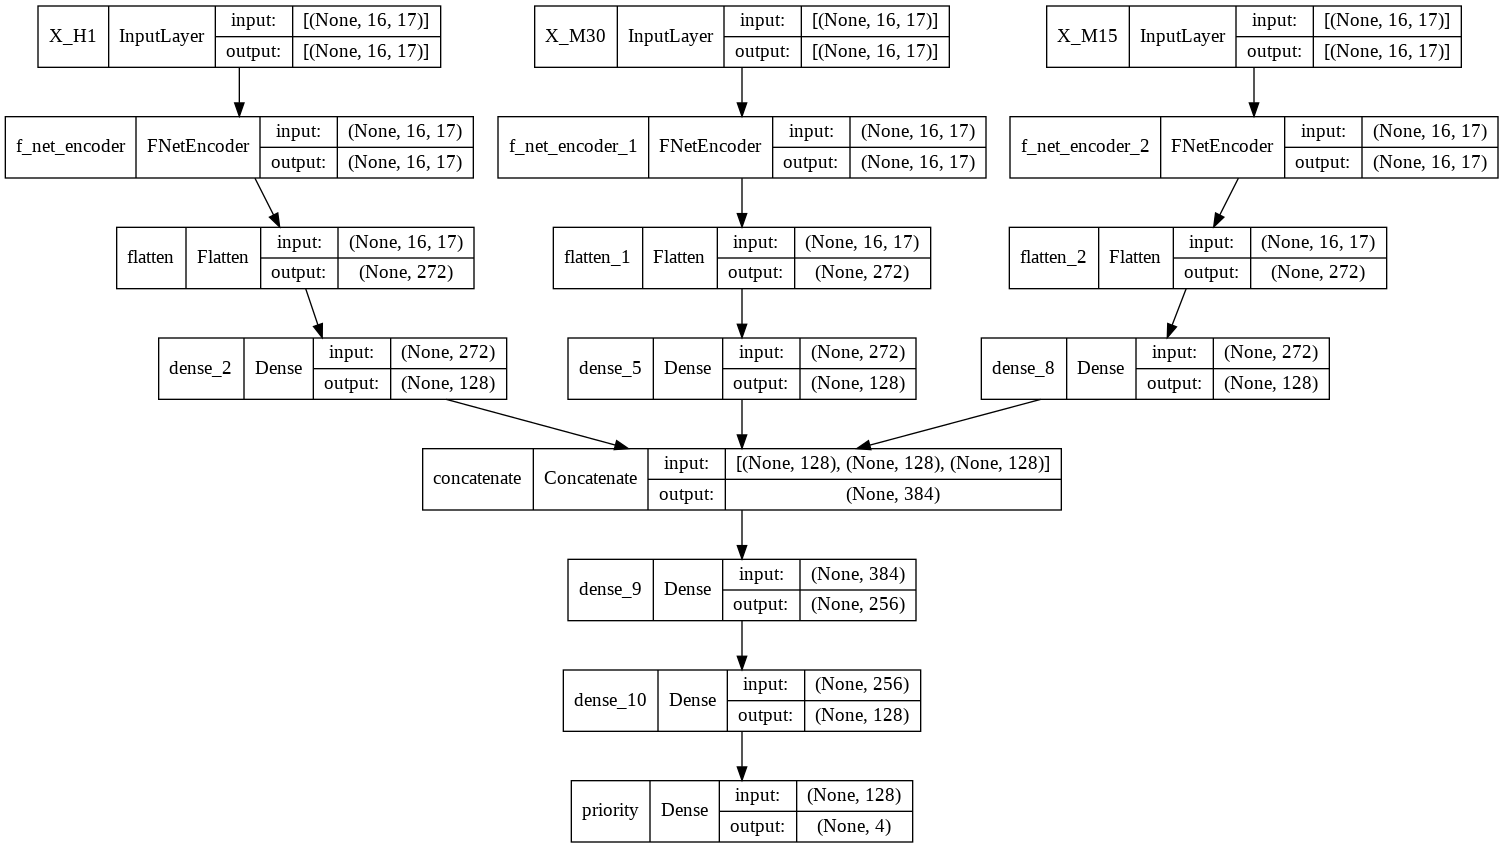

In [ ]:
from keras.layers.embeddings import Embedding
model = keras.Model(inputs=[inp_H1, inp_M30, inp_M15], outputs=[out])
keras.utils.plot_model(model, "multi_input_and_output_model.png", show_shapes=True)

In [ ]:
model.compile(
    optimizer = keras.optimizers.Adam(1e-3),
    loss={"priority": 'mean_squared_error',}
)

In [ ]:
tf.config.experimental_run_functions_eagerly(True)

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger, Callback

best_model_path = os.path.join(r'/content/checkpoint/model_{epoch:03d}', 'best_model_keras')
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1,
                   patience=20, min_delta=1e-8)
rlp = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=4, verbose=1, mode='min',
                        min_delta=1e-8, cooldown=1, min_lr=1e-5)
mcp = ModelCheckpoint(best_model_path, monitor='val_loss', verbose=1,
                      save_best_only=True, save_weights_only=False, mode='min') 

Instructions for updating:
Use `tf.config.run_functions_eagerly` instead of the experimental version.


In [ ]:
model.fit(
    {"X_H1": train_H1_X, "X_M30": train_m30_X, "X_M15": train_m15_X},{"priority": train_m15_y},
    epochs=100,
    batch_size=128,
    validation_data=({"X_H1": valid_H1_X, "X_M30": valid_m30_X, "X_M15": valid_m15_X}, {"priority": valid_m15_y}),
    callbacks=[mcp, rlp, es]
    )


/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


Epoch 1/100
437/437 [==============================] - ETA: 0s - loss: 0.0813
Epoch 00001: val_loss improved from inf to 0.00210, saving model to /content/checkpoint/model_001/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_001/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_001/best_model_keras/assets


437/437 [==============================] - 86s 196ms/step - loss: 0.0813 - val_loss: 0.0021 - lr: 0.0010
Epoch 2/100
437/437 [==============================] - ETA: 0s - loss: 0.0012
Epoch 00002: val_loss improved from 0.00210 to 0.00077, saving model to /content/checkpoint/model_002/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_002/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_002/best_model_keras/assets


437/437 [==============================] - 86s 196ms/step - loss: 0.0012 - val_loss: 7.7210e-04 - lr: 0.0010
Epoch 3/100
437/437 [==============================] - ETA: 0s - loss: 6.1931e-04
Epoch 00003: val_loss improved from 0.00077 to 0.00046, saving model to /content/checkpoint/model_003/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_003/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_003/best_model_keras/assets


437/437 [==============================] - 85s 194ms/step - loss: 6.1931e-04 - val_loss: 4.5793e-04 - lr: 0.0010
Epoch 4/100
437/437 [==============================] - ETA: 0s - loss: 4.6954e-04
Epoch 00004: val_loss improved from 0.00046 to 0.00030, saving model to /content/checkpoint/model_004/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_004/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_004/best_model_keras/assets


437/437 [==============================] - 84s 193ms/step - loss: 4.6954e-04 - val_loss: 3.0309e-04 - lr: 0.0010
Epoch 5/100
437/437 [==============================] - ETA: 0s - loss: 7.2237e-04
Epoch 00005: val_loss did not improve from 0.00030
437/437 [==============================] - 74s 168ms/step - loss: 7.2237e-04 - val_loss: 0.0013 - lr: 0.0010
Epoch 6/100
437/437 [==============================] - ETA: 0s - loss: 3.7631e-04
Epoch 00006: val_loss did not improve from 0.00030
437/437 [==============================] - 73s 167ms/step - loss: 3.7631e-04 - val_loss: 3.4477e-04 - lr: 0.0010
Epoch 7/100
437/437 [==============================] - ETA: 0s - loss: 4.4645e-04
Epoch 00007: val_loss did not improve from 0.00030
437/437 [==============================] - 73s 168ms/step - loss: 4.4645e-04 - val_loss: 4.7167e-04 - lr: 0.0010
Epoch 8/100
437/437 [==============================] - ETA: 0s - loss: 5.0448e-04
Epoch 00008: val_loss did not improve from 0.00030

Epoch 00008: Reduce

INFO:tensorflow:Assets written to: /content/checkpoint/model_009/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_009/best_model_keras/assets


437/437 [==============================] - 85s 194ms/step - loss: 4.1087e-05 - val_loss: 1.9045e-05 - lr: 5.0000e-04
Epoch 10/100
437/437 [==============================] - ETA: 0s - loss: 2.4288e-05
Epoch 00010: val_loss did not improve from 0.00002
437/437 [==============================] - 72s 165ms/step - loss: 2.4288e-05 - val_loss: 3.8465e-05 - lr: 5.0000e-04
Epoch 11/100
437/437 [==============================] - ETA: 0s - loss: 3.5621e-05
Epoch 00011: val_loss did not improve from 0.00002
437/437 [==============================] - 74s 169ms/step - loss: 3.5621e-05 - val_loss: 7.0530e-05 - lr: 5.0000e-04
Epoch 12/100
437/437 [==============================] - ETA: 0s - loss: 9.2078e-05
Epoch 00012: val_loss did not improve from 0.00002
437/437 [==============================] - 73s 167ms/step - loss: 9.2078e-05 - val_loss: 3.4938e-04 - lr: 5.0000e-04
Epoch 13/100
437/437 [==============================] - ETA: 0s - loss: 4.6400e-04
Epoch 00013: val_loss did not improve from 0.00

INFO:tensorflow:Assets written to: /content/checkpoint/model_014/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_014/best_model_keras/assets


437/437 [==============================] - 86s 196ms/step - loss: 2.3926e-05 - val_loss: 1.4331e-05 - lr: 2.5000e-04
Epoch 15/100
437/437 [==============================] - ETA: 0s - loss: 9.6755e-06
Epoch 00015: val_loss improved from 0.00001 to 0.00001, saving model to /content/checkpoint/model_015/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_015/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_015/best_model_keras/assets


437/437 [==============================] - 84s 192ms/step - loss: 9.6755e-06 - val_loss: 1.1731e-05 - lr: 2.5000e-04
Epoch 16/100
437/437 [==============================] - ETA: 0s - loss: 1.4174e-05
Epoch 00016: val_loss did not improve from 0.00001
437/437 [==============================] - 72s 166ms/step - loss: 1.4174e-05 - val_loss: 2.7070e-05 - lr: 2.5000e-04
Epoch 17/100
437/437 [==============================] - ETA: 0s - loss: 6.9857e-05
Epoch 00017: val_loss did not improve from 0.00001
437/437 [==============================] - 74s 169ms/step - loss: 6.9857e-05 - val_loss: 1.3195e-04 - lr: 2.5000e-04
Epoch 18/100
437/437 [==============================] - ETA: 0s - loss: 1.8169e-04
Epoch 00018: val_loss did not improve from 0.00001
437/437 [==============================] - 73s 168ms/step - loss: 1.8169e-04 - val_loss: 1.9821e-04 - lr: 2.5000e-04
Epoch 19/100
437/437 [==============================] - ETA: 0s - loss: 1.6505e-04
Epoch 00019: val_loss did not improve from 0.00

INFO:tensorflow:Assets written to: /content/checkpoint/model_020/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_020/best_model_keras/assets


437/437 [==============================] - 84s 193ms/step - loss: 1.6526e-05 - val_loss: 7.8101e-06 - lr: 1.2500e-04
Epoch 21/100
437/437 [==============================] - ETA: 0s - loss: 7.4031e-06
Epoch 00021: val_loss improved from 0.00001 to 0.00001, saving model to /content/checkpoint/model_021/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_021/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_021/best_model_keras/assets


437/437 [==============================] - 86s 197ms/step - loss: 7.4031e-06 - val_loss: 6.7788e-06 - lr: 1.2500e-04
Epoch 22/100
437/437 [==============================] - ETA: 0s - loss: 1.1583e-05
Epoch 00022: val_loss did not improve from 0.00001
437/437 [==============================] - 74s 169ms/step - loss: 1.1583e-05 - val_loss: 1.6058e-05 - lr: 1.2500e-04
Epoch 23/100
437/437 [==============================] - ETA: 0s - loss: 2.8408e-05
Epoch 00023: val_loss did not improve from 0.00001
437/437 [==============================] - 74s 168ms/step - loss: 2.8408e-05 - val_loss: 1.0321e-04 - lr: 1.2500e-04
Epoch 24/100
437/437 [==============================] - ETA: 0s - loss: 7.2825e-05
Epoch 00024: val_loss did not improve from 0.00001
437/437 [==============================] - 73s 167ms/step - loss: 7.2825e-05 - val_loss: 4.0983e-05 - lr: 1.2500e-04
Epoch 25/100
437/437 [==============================] - ETA: 0s - loss: 3.3885e-05
Epoch 00025: val_loss did not improve from 0.00

INFO:tensorflow:Assets written to: /content/checkpoint/model_026/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_026/best_model_keras/assets


437/437 [==============================] - 85s 195ms/step - loss: 5.5717e-06 - val_loss: 3.5519e-06 - lr: 6.2500e-05
Epoch 27/100
437/437 [==============================] - ETA: 0s - loss: 6.6514e-06
Epoch 00027: val_loss did not improve from 0.00000
437/437 [==============================] - 74s 168ms/step - loss: 6.6514e-06 - val_loss: 6.3171e-06 - lr: 6.2500e-05
Epoch 28/100
437/437 [==============================] - ETA: 0s - loss: 8.1066e-06
Epoch 00028: val_loss did not improve from 0.00000
437/437 [==============================] - 73s 168ms/step - loss: 8.1066e-06 - val_loss: 8.4684e-06 - lr: 6.2500e-05
Epoch 29/100
437/437 [==============================] - ETA: 0s - loss: 1.5667e-05
Epoch 00029: val_loss did not improve from 0.00000
437/437 [==============================] - 74s 169ms/step - loss: 1.5667e-05 - val_loss: 1.3210e-05 - lr: 6.2500e-05
Epoch 30/100
437/437 [==============================] - ETA: 0s - loss: 1.9434e-05
Epoch 00030: val_loss did not improve from 0.00

INFO:tensorflow:Assets written to: /content/checkpoint/model_031/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_031/best_model_keras/assets


437/437 [==============================] - 86s 197ms/step - loss: 4.0040e-06 - val_loss: 2.9912e-06 - lr: 3.1250e-05
Epoch 32/100
437/437 [==============================] - ETA: 0s - loss: 4.5864e-06
Epoch 00032: val_loss did not improve from 0.00000
437/437 [==============================] - 74s 169ms/step - loss: 4.5864e-06 - val_loss: 5.8870e-06 - lr: 3.1250e-05
Epoch 33/100
437/437 [==============================] - ETA: 0s - loss: 5.9056e-06
Epoch 00033: val_loss did not improve from 0.00000
437/437 [==============================] - 74s 170ms/step - loss: 5.9056e-06 - val_loss: 4.3756e-06 - lr: 3.1250e-05
Epoch 34/100
437/437 [==============================] - ETA: 0s - loss: 6.5578e-06
Epoch 00034: val_loss did not improve from 0.00000
437/437 [==============================] - 73s 168ms/step - loss: 6.5578e-06 - val_loss: 4.2263e-06 - lr: 3.1250e-05
Epoch 35/100
437/437 [==============================] - ETA: 0s - loss: 7.4810e-06
Epoch 00035: val_loss did not improve from 0.00

INFO:tensorflow:Assets written to: /content/checkpoint/model_036/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_036/best_model_keras/assets


437/437 [==============================] - 86s 198ms/step - loss: 3.5355e-06 - val_loss: 2.5576e-06 - lr: 1.5625e-05
Epoch 37/100
437/437 [==============================] - ETA: 0s - loss: 3.5317e-06
Epoch 00037: val_loss did not improve from 0.00000
437/437 [==============================] - 74s 170ms/step - loss: 3.5317e-06 - val_loss: 2.9151e-06 - lr: 1.5625e-05
Epoch 38/100
437/437 [==============================] - ETA: 0s - loss: 3.8358e-06
Epoch 00038: val_loss did not improve from 0.00000
437/437 [==============================] - 74s 169ms/step - loss: 3.8358e-06 - val_loss: 2.7141e-06 - lr: 1.5625e-05
Epoch 39/100
437/437 [==============================] - ETA: 0s - loss: 4.1290e-06
Epoch 00039: val_loss did not improve from 0.00000
437/437 [==============================] - 75s 171ms/step - loss: 4.1290e-06 - val_loss: 3.8862e-06 - lr: 1.5625e-05
Epoch 40/100
437/437 [==============================] - ETA: 0s - loss: 4.1926e-06
Epoch 00040: val_loss did not improve from 0.00

INFO:tensorflow:Assets written to: /content/checkpoint/model_041/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_041/best_model_keras/assets


437/437 [==============================] - 87s 199ms/step - loss: 3.1928e-06 - val_loss: 2.1961e-06 - lr: 1.0000e-05
Epoch 42/100
437/437 [==============================] - ETA: 0s - loss: 3.2655e-06
Epoch 00042: val_loss did not improve from 0.00000
437/437 [==============================] - 74s 168ms/step - loss: 3.2655e-06 - val_loss: 2.2269e-06 - lr: 1.0000e-05
Epoch 43/100
437/437 [==============================] - ETA: 0s - loss: 3.2998e-06
Epoch 00043: val_loss did not improve from 0.00000
437/437 [==============================] - 74s 169ms/step - loss: 3.2998e-06 - val_loss: 2.5985e-06 - lr: 1.0000e-05
Epoch 44/100
437/437 [==============================] - ETA: 0s - loss: 3.4003e-06
Epoch 00044: val_loss did not improve from 0.00000
437/437 [==============================] - 74s 169ms/step - loss: 3.4003e-06 - val_loss: 2.2374e-06 - lr: 1.0000e-05
Epoch 45/100
437/437 [==============================] - ETA: 0s - loss: 3.4929e-06
Epoch 00045: val_loss improved from 0.00000 to 

INFO:tensorflow:Assets written to: /content/checkpoint/model_045/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_045/best_model_keras/assets


437/437 [==============================] - 86s 196ms/step - loss: 3.4929e-06 - val_loss: 2.0649e-06 - lr: 1.0000e-05
Epoch 46/100
437/437 [==============================] - ETA: 0s - loss: 3.4334e-06
Epoch 00046: val_loss improved from 0.00000 to 0.00000, saving model to /content/checkpoint/model_046/best_model_keras


INFO:tensorflow:Assets written to: /content/checkpoint/model_046/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_046/best_model_keras/assets


437/437 [==============================] - 85s 194ms/step - loss: 3.4334e-06 - val_loss: 1.9679e-06 - lr: 1.0000e-05
Epoch 47/100
437/437 [==============================] - ETA: 0s - loss: 3.4267e-06
Epoch 00047: val_loss did not improve from 0.00000
437/437 [==============================] - 74s 169ms/step - loss: 3.4267e-06 - val_loss: 2.3321e-06 - lr: 1.0000e-05
Epoch 48/100
437/437 [==============================] - ETA: 0s - loss: 3.3541e-06
Epoch 00048: val_loss did not improve from 0.00000
437/437 [==============================] - 74s 170ms/step - loss: 3.3541e-06 - val_loss: 2.3133e-06 - lr: 1.0000e-05
Epoch 49/100
437/437 [==============================] - ETA: 0s - loss: 3.4223e-06
Epoch 00049: val_loss did not improve from 0.00000
437/437 [==============================] - 74s 169ms/step - loss: 3.4223e-06 - val_loss: 2.6430e-06 - lr: 1.0000e-05
Epoch 50/100
437/437 [==============================] - ETA: 0s - loss: 3.4509e-06
Epoch 00050: val_loss did not improve from 0.00

INFO:tensorflow:Assets written to: /content/checkpoint/model_055/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_055/best_model_keras/assets


437/437 [==============================] - 85s 195ms/step - loss: 3.3941e-06 - val_loss: 1.9578e-06 - lr: 1.0000e-05
Epoch 56/100
437/437 [==============================] - ETA: 0s - loss: 3.4273e-06
Epoch 00056: val_loss did not improve from 0.00000
437/437 [==============================] - 74s 169ms/step - loss: 3.4273e-06 - val_loss: 2.2276e-06 - lr: 1.0000e-05
Epoch 57/100
437/437 [==============================] - ETA: 0s - loss: 3.2294e-06
Epoch 00057: val_loss did not improve from 0.00000
437/437 [==============================] - 74s 170ms/step - loss: 3.2294e-06 - val_loss: 2.1644e-06 - lr: 1.0000e-05
Epoch 58/100
437/437 [==============================] - ETA: 0s - loss: 3.2808e-06
Epoch 00058: val_loss did not improve from 0.00000
437/437 [==============================] - 73s 168ms/step - loss: 3.2808e-06 - val_loss: 2.5249e-06 - lr: 1.0000e-05
Epoch 59/100
437/437 [==============================] - ETA: 0s - loss: 3.2083e-06
Epoch 00059: val_loss did not improve from 0.00

INFO:tensorflow:Assets written to: /content/checkpoint/model_064/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_064/best_model_keras/assets


437/437 [==============================] - 86s 197ms/step - loss: 3.3613e-06 - val_loss: 1.8865e-06 - lr: 1.0000e-05
Epoch 65/100
437/437 [==============================] - ETA: 0s - loss: 3.1792e-06
Epoch 00065: val_loss did not improve from 0.00000
437/437 [==============================] - 74s 170ms/step - loss: 3.1792e-06 - val_loss: 2.1278e-06 - lr: 1.0000e-05
Epoch 66/100
437/437 [==============================] - ETA: 0s - loss: 3.1104e-06
Epoch 00066: val_loss did not improve from 0.00000
437/437 [==============================] - 74s 170ms/step - loss: 3.1104e-06 - val_loss: 2.5845e-06 - lr: 1.0000e-05
Epoch 67/100
437/437 [==============================] - ETA: 0s - loss: 3.1098e-06
Epoch 00067: val_loss did not improve from 0.00000
437/437 [==============================] - 86s 196ms/step - loss: 3.1098e-06 - val_loss: 2.1691e-06 - lr: 1.0000e-05
Epoch 68/100
437/437 [==============================] - ETA: 0s - loss: 3.1236e-06
Epoch 00068: val_loss did not improve from 0.00

INFO:tensorflow:Assets written to: /content/checkpoint/model_071/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_071/best_model_keras/assets


437/437 [==============================] - 86s 198ms/step - loss: 2.9962e-06 - val_loss: 1.7960e-06 - lr: 1.0000e-05
Epoch 72/100
437/437 [==============================] - ETA: 0s - loss: 2.9257e-06
Epoch 00072: val_loss did not improve from 0.00000
437/437 [==============================] - 75s 171ms/step - loss: 2.9257e-06 - val_loss: 1.9957e-06 - lr: 1.0000e-05
Epoch 73/100
437/437 [==============================] - ETA: 0s - loss: 3.0057e-06
Epoch 00073: val_loss did not improve from 0.00000
437/437 [==============================] - 74s 170ms/step - loss: 3.0057e-06 - val_loss: 1.8965e-06 - lr: 1.0000e-05
Epoch 74/100
437/437 [==============================] - ETA: 0s - loss: 3.0328e-06
Epoch 00074: val_loss did not improve from 0.00000
437/437 [==============================] - 74s 170ms/step - loss: 3.0328e-06 - val_loss: 2.2374e-06 - lr: 1.0000e-05
Epoch 75/100
437/437 [==============================] - ETA: 0s - loss: 2.9284e-06
Epoch 00075: val_loss improved from 0.00000 to 

INFO:tensorflow:Assets written to: /content/checkpoint/model_075/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_075/best_model_keras/assets


437/437 [==============================] - 86s 197ms/step - loss: 2.9284e-06 - val_loss: 1.6770e-06 - lr: 1.0000e-05
Epoch 76/100
437/437 [==============================] - ETA: 0s - loss: 2.9930e-06
Epoch 00076: val_loss did not improve from 0.00000
437/437 [==============================] - 75s 171ms/step - loss: 2.9930e-06 - val_loss: 2.0906e-06 - lr: 1.0000e-05
Epoch 77/100
437/437 [==============================] - ETA: 0s - loss: 2.9450e-06
Epoch 00077: val_loss did not improve from 0.00000
437/437 [==============================] - 76s 173ms/step - loss: 2.9450e-06 - val_loss: 2.1555e-06 - lr: 1.0000e-05
Epoch 78/100
437/437 [==============================] - ETA: 0s - loss: 2.7913e-06
Epoch 00078: val_loss did not improve from 0.00000
437/437 [==============================] - 76s 175ms/step - loss: 2.7913e-06 - val_loss: 2.1398e-06 - lr: 1.0000e-05
Epoch 79/100
437/437 [==============================] - ETA: 0s - loss: 2.9520e-06
Epoch 00079: val_loss did not improve from 0.00

INFO:tensorflow:Assets written to: /content/checkpoint/model_088/best_model_keras/assets


INFO:tensorflow:Assets written to: /content/checkpoint/model_088/best_model_keras/assets


437/437 [==============================] - 98s 225ms/step - loss: 2.7442e-06 - val_loss: 1.6718e-06 - lr: 1.0000e-05
Epoch 89/100
437/437 [==============================] - ETA: 0s - loss: 2.7858e-06
Epoch 00089: val_loss did not improve from 0.00000
437/437 [==============================] - 75s 172ms/step - loss: 2.7858e-06 - val_loss: 2.2749e-06 - lr: 1.0000e-05
Epoch 90/100
437/437 [==============================] - ETA: 0s - loss: 2.7528e-06
Epoch 00090: val_loss did not improve from 0.00000
437/437 [==============================] - 75s 173ms/step - loss: 2.7528e-06 - val_loss: 1.9737e-06 - lr: 1.0000e-05
Epoch 91/100
437/437 [==============================] - ETA: 0s - loss: 2.7383e-06
Epoch 00091: val_loss did not improve from 0.00000
437/437 [==============================] - 85s 196ms/step - loss: 2.7383e-06 - val_loss: 2.0804e-06 - lr: 1.0000e-05
Epoch 92/100
437/437 [==============================] - ETA: 0s - loss: 2.7038e-06
Epoch 00092: val_loss did not improve from 0.00

# Load model to evaluate

In [88]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Downloading files
!pip install googledrivedownloader
from google_drive_downloader import GoogleDriveDownloader as gdd

In [89]:
gdd.download_file_from_google_drive(file_id='1iTX5I1ViyVrU1P-aTikpBVi0HMfq1xIA',dest_path='./model.zip',unzip=True)
model_load = load_model(r'/content/model')
prd_price = model_load.predict({"X_H1": test_H1_X, "X_M30": test_m30_X, "X_M15": test_m15_X})

Unzipping...Done.


In [90]:
predict_price_inver= prd_price * max_y_rows_15m[int(m15_X.shape[0] * 0.85):, np.newaxis]
real_price = test_m15_y * max_y_rows_15m[int(m15_X.shape[0] * 0.85):, np.newaxis]

print('Mean_squared_error = ', mean_squared_error(real_price, predict_price_inver))    # The smaller the better
print('Root mean_squared_error = ', math.sqrt(mean_squared_error(real_price, predict_price_inver)))    # The smaller the better
print('Explained_variance_score = ', explained_variance_score(real_price, predict_price_inver))   # The closer to 1, the better
print('R2_score = ', r2_score(real_price, predict_price_inver, multioutput='variance_weighted'))   # The closer to 1, the better

Mean_squared_error =  9.114723837458526e-07
Root mean_squared_error =  0.000954710628277413
Explained_variance_score =  0.9954283762387718
R2_score =  0.9953864629776512


# Evaluate if you have trained the model

In [ ]:
from sklearn.metrics import mean_absolute_error

from sklearn.metrics import explained_variance_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
model = load_model('checkpoint/model_088/best_model_keras')
prd_price = model.predict({"X_H1": test_H1_X, "X_M30": test_m30_X, "X_M15": test_m15_X})

# print('Mean_absolute_error = ', mean_absolute_error(test_m15_y, prd_price))    # The smaller the better
# print('Mean_squared_error = ', mean_squared_error(test_m15_y, prd_price))    # The smaller the better
# print('Root mean_squared_error = ', math.sqrt(mean_squared_error(test_m15_y, prd_price)))    # The smaller the better
# print('Explained_variance_score = ', explained_variance_score(test_m15_y, prd_price))   # The closer to 1, the better
# print('R2_score = ', r2_score(test_m15_y, prd_price, multioutput='variance_weighted'))   # The closer to 1, the better

/usr/local/lib/python3.7/dist-packages/tensorflow/python/data/ops/dataset_ops.py:4527: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  "Even though the `tf.config.experimental_run_functions_eagerly` "


In [ ]:
predict_price_inver= prd_price * max_y_rows_15m[int(m15_X.shape[0] * 0.85):, np.newaxis]

In [ ]:
real_price = test_m15_y * max_y_rows_15m[int(m15_X.shape[0] * 0.85):, np.newaxis]

In [ ]:
print('Mean_squared_error = ', mean_squared_error(real_price, predict_price_inver))    # The smaller the better
print('Root mean_squared_error = ', math.sqrt(mean_squared_error(real_price, predict_price_inver)))    # The smaller the better
print('Explained_variance_score = ', explained_variance_score(real_price, predict_price_inver))   # The closer to 1, the better
print('R2_score = ', r2_score(real_price, predict_price_inver, multioutput='variance_weighted'))   # The closer to 1, the better

Mean_squared_error =  9.114727363549405e-07
Root mean_squared_error =  0.0009547108129454387
Explained_variance_score =  0.9954283745144641
R2_score =  0.9953864611928738


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>